## Data Analysis of the Winscousin Breast Cancer dataset

In [1]:
# Import the requred libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("breast_cancer_ds.csv")

In [3]:
print("number of data points - rows")
df.shape[0]

number of data points - rows


569

In [4]:
print("number of features")
df.shape[1]

number of features


33

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# A breast cancer has 2 major tumors: malignant and benign tumor
# malignant tumor has irregular borders and grows faster than a benign tumor.
# benign tumor: This indicates absense of the tumor

In [7]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [9]:
# from the top five data points, our most important column is the diagnosis which checks if it is malignant or benign
# M - Malignant
# B - Benign

In [10]:
# Get the statistical summary
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [11]:
# All featues looks good except fo the last one which is unamed.
# Drop it
df = df.dropna(axis=1, how='all')

In [12]:
print("New dataset")
df.describe()

New dataset


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [13]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [14]:
def map_result(list_items):
    """Map the malignant and the Benign to 1 and 0 respectively"""
    index = 0
    for value in list_items:
        if value == 'M':
            list_items[index] = 1
        elif value == 'B':
            list_items[index] = 0
        index += 1
    return list_items

In [15]:
df['diagnosis'] = map_result(df['diagnosis'])

<ipython-input-14-8d063aafbc69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_items[index] = 1
<ipython-input-14-8d063aafbc69>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_items[index] = 0


In [16]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [17]:
# check our result
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

In [18]:
# Time for analysing our dataset
# Get the total number of malignant and benign tumor present in the diagnosis column
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

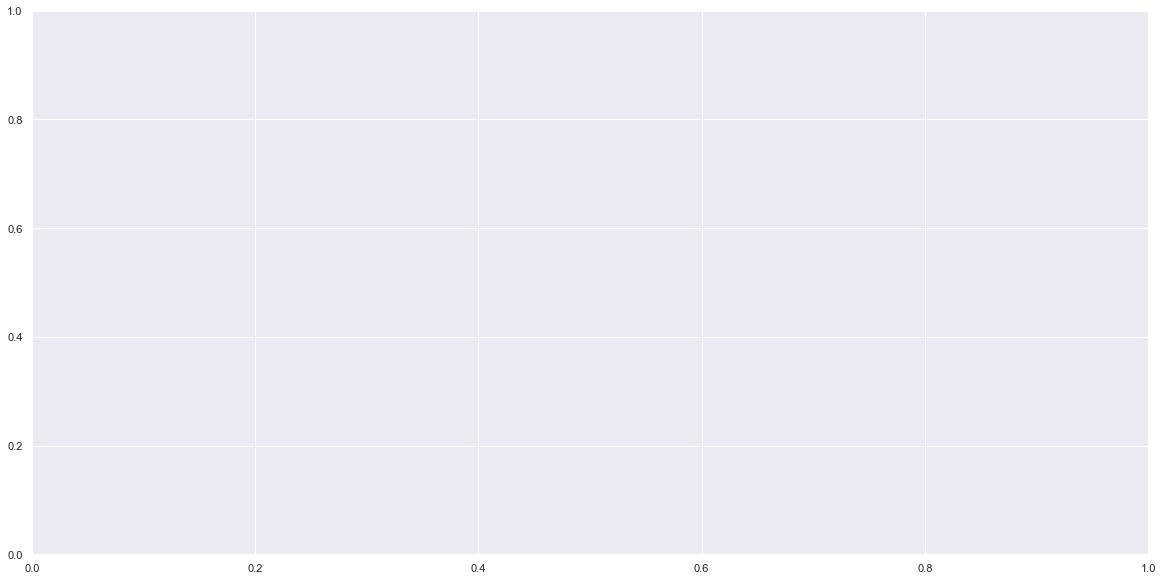

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))

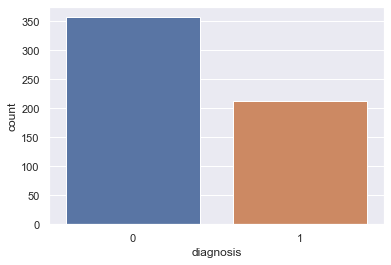

In [19]:
ax = sns.countplot(x='diagnosis', data=df, order=df['diagnosis'].value_counts().index)

In [98]:
ax.set_title('Cancer classes')

Text(0.5, 1.0, 'Cancer classes')

In [ ]:
!sudo apt install python3-tk

In [ ]:
fig.savefig('Cancer classes')

In [25]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [114]:
# using heatmaps since we are working on two major variables - M and B - to enable us see their relationship

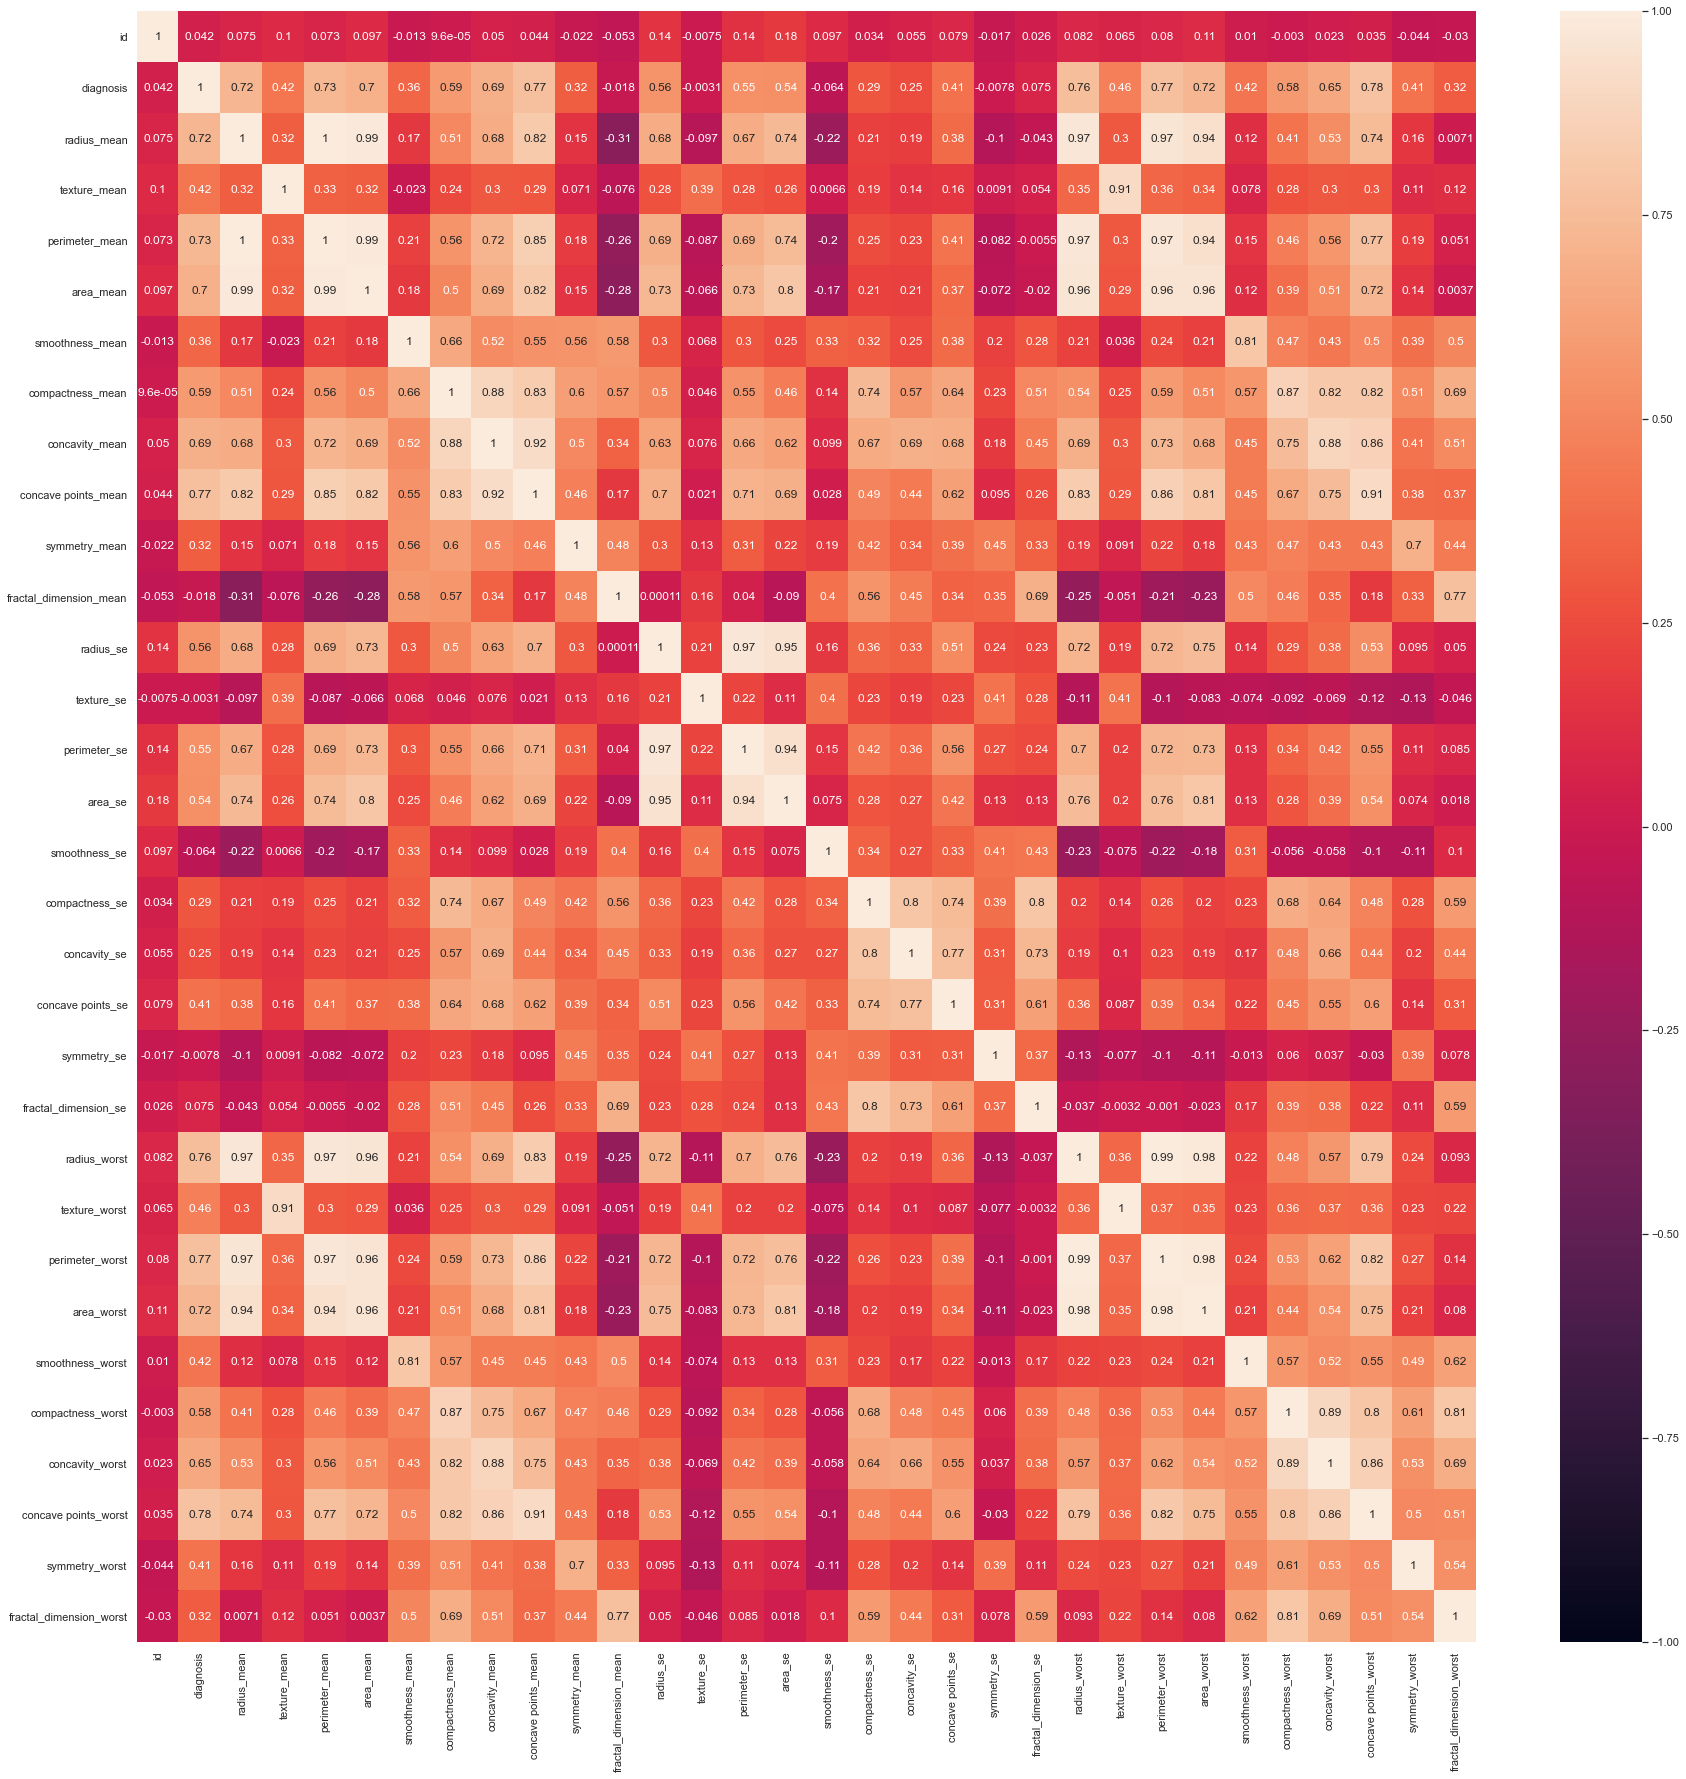

In [152]:
plt.figure(figsize =(30,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
# using more clearer plot like the pair plot to enable us understand our data

In [ ]:
# Next is make a comparison between our main feature(malignant and benign) and the other features in order
# to understand their relationship to better understand the dataset

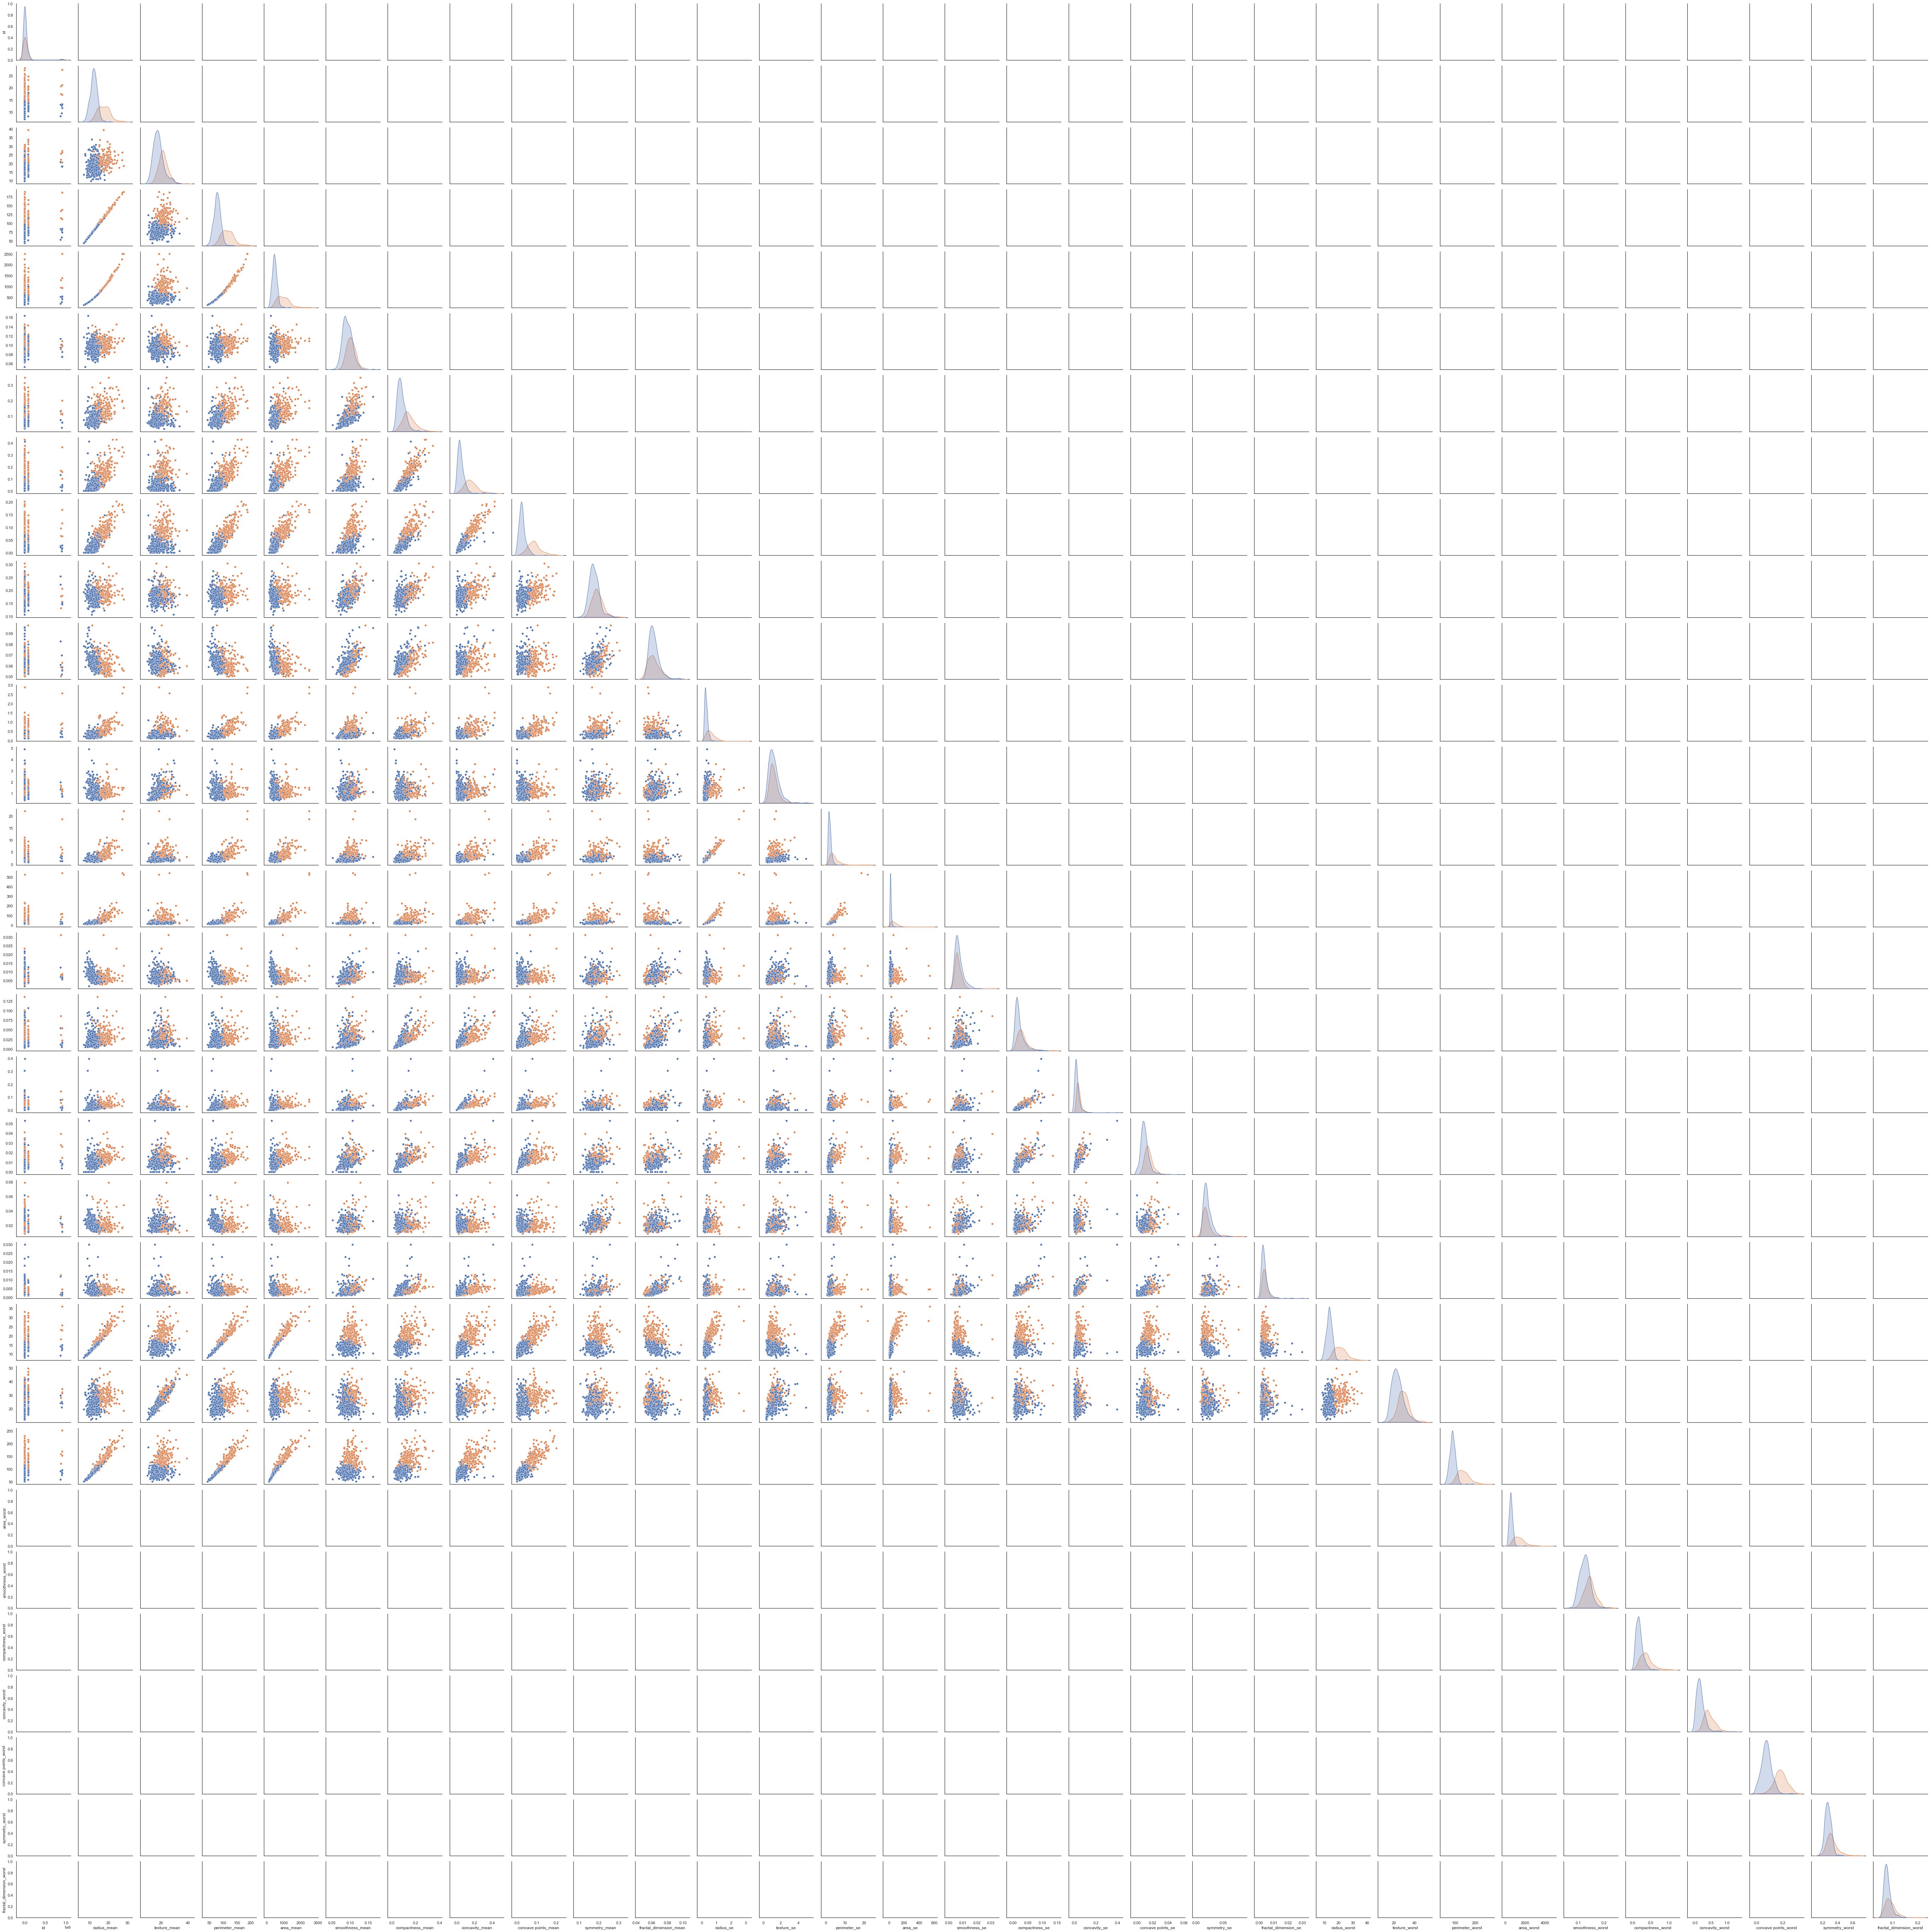

In [121]:
sns.pairplot(df, hue = "diagnosis", diag_kind='kde')
plt.show()

In [ ]:
# running the above graph which was 30 features against the diagnosis took to much time and won't suffice
# subsequently diagnosing our dataset
# We will use the average of each column

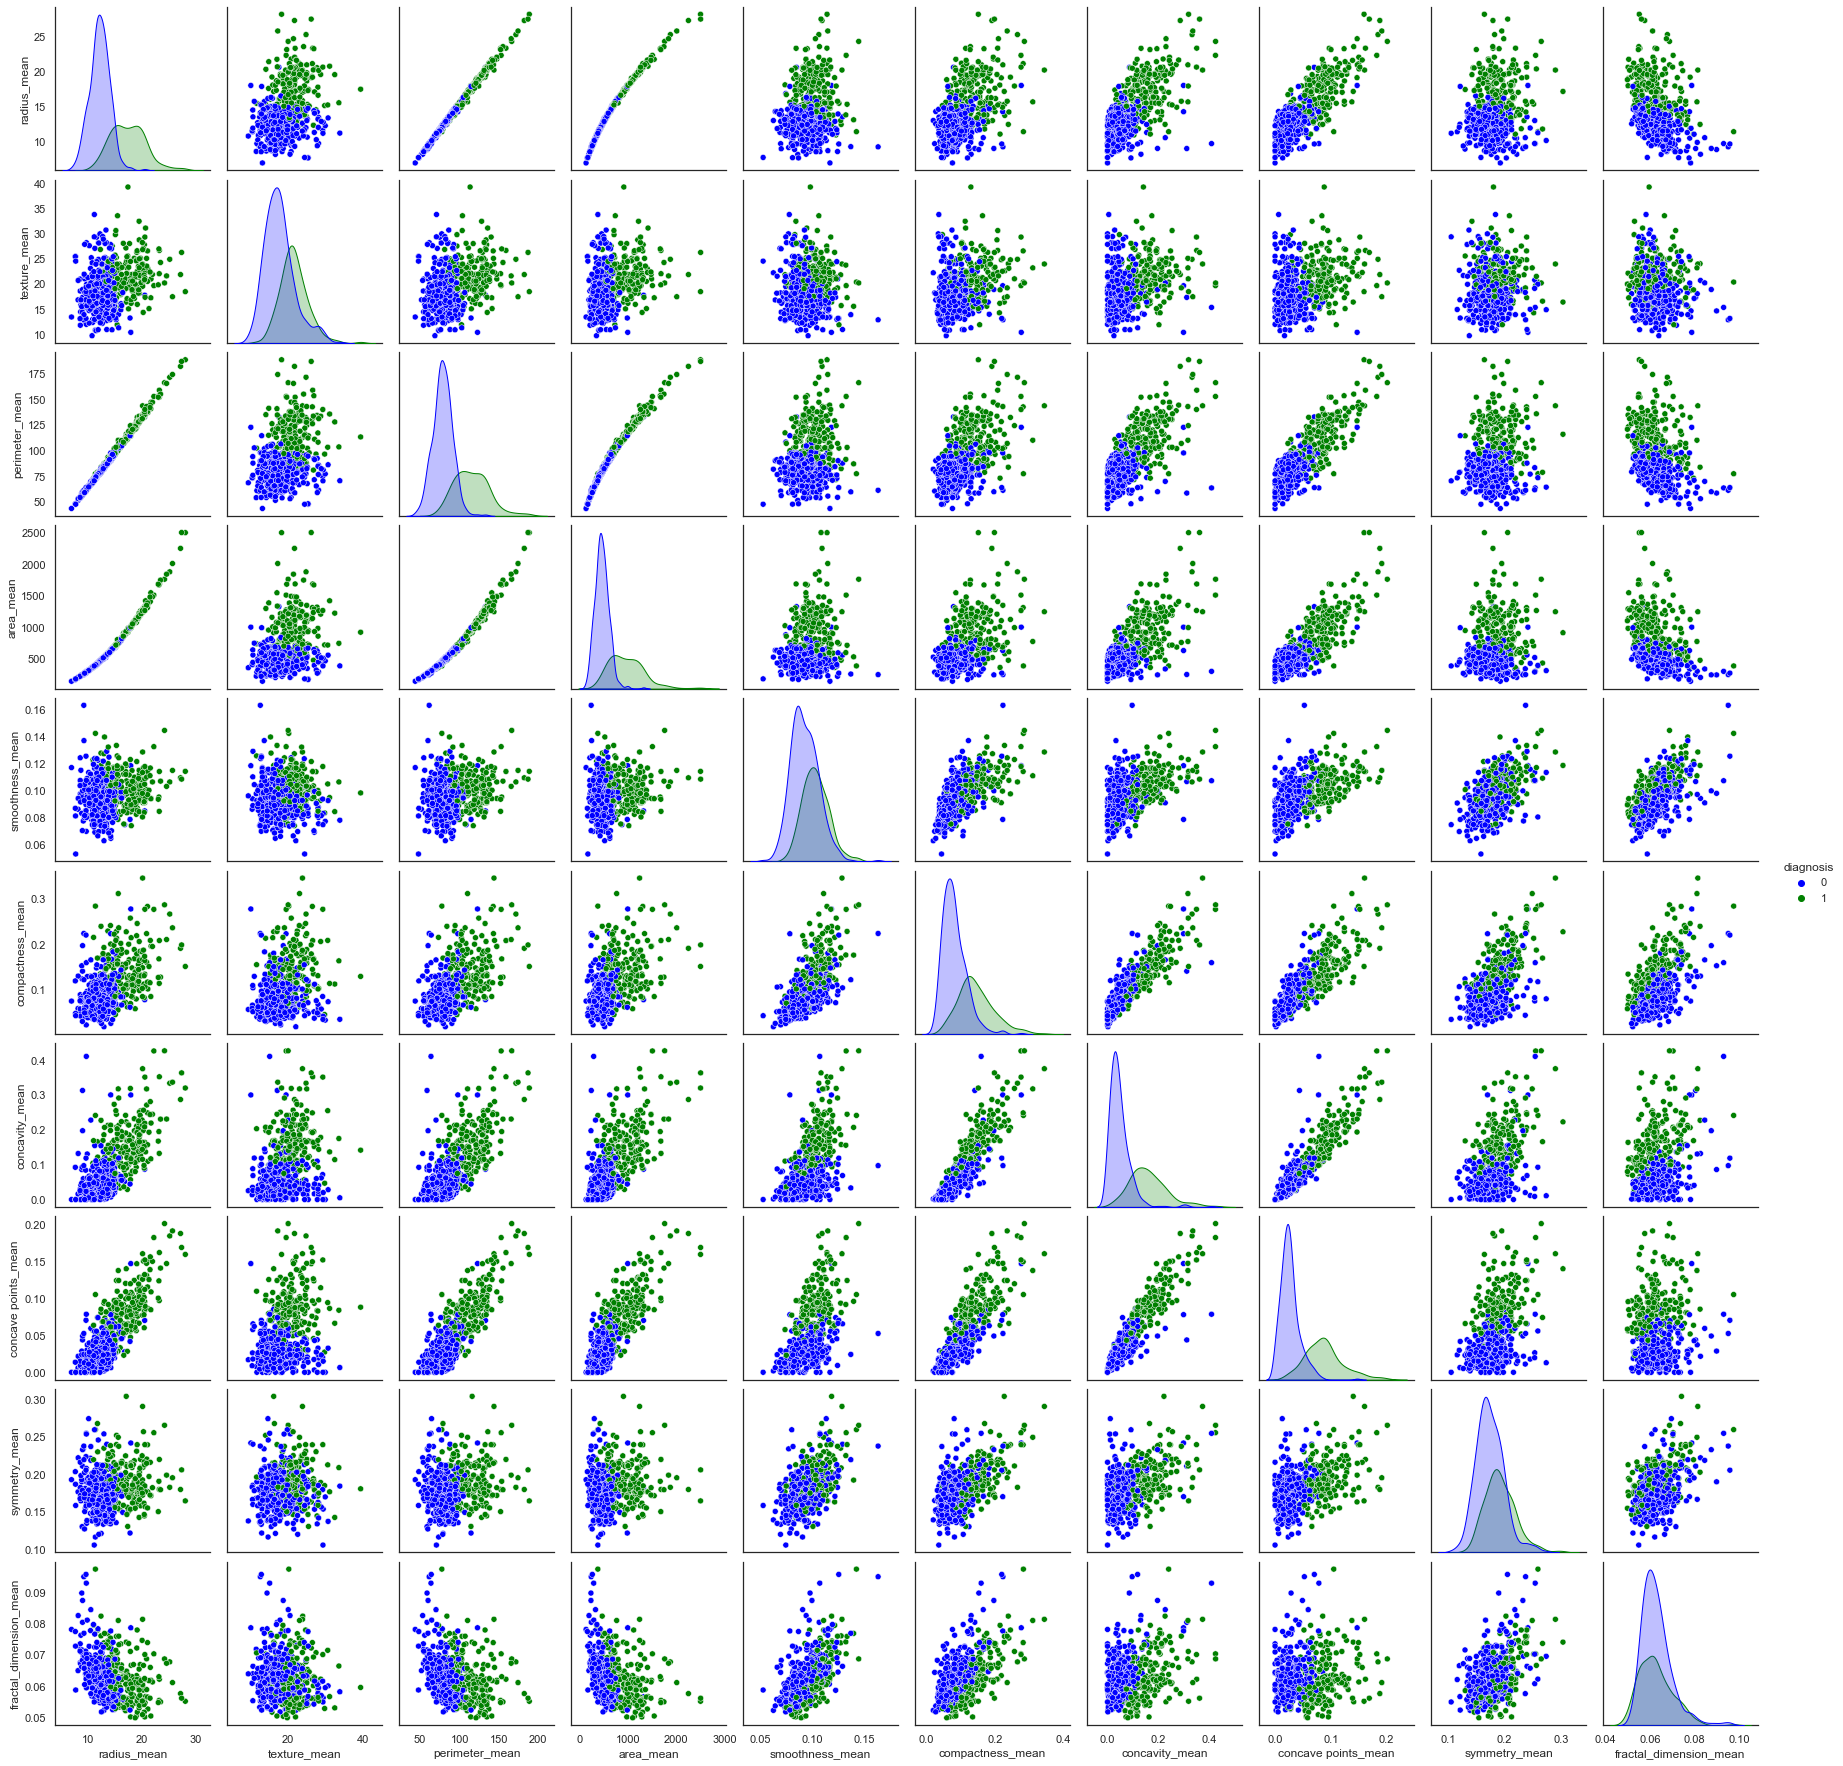

In [122]:
columns_mean=('diagnosis', 'radius_mean','texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')
df_mean = pd.DataFrame(df,columns = columns_mean)
sns.pairplot(df_mean, hue = "diagnosis", diag_kind='kde',palette = ["blue","green"])

In [124]:
# Next we analyze some of the boxes of each pairplot to see how they corellate with each other in a much
# more clearer view

In [126]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

In [139]:
axs = fig.add_axes([0, 0, 1, 1])

<ipython-input-139-982df96969c4>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axs = fig.add_axes([0, 0, 1, 1])


Projecting the 30-dimensional data to 2D


Text(0.5, 1.0, 'PCA projection of Breast Cancer Dataset')

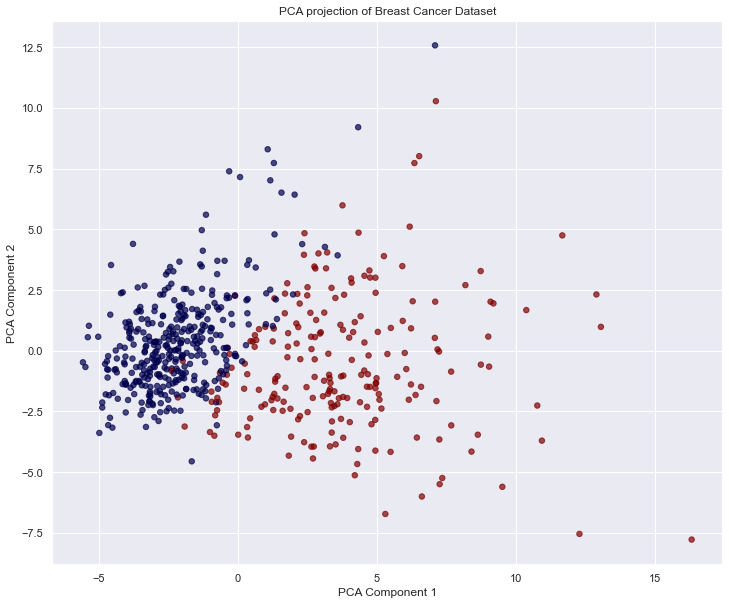

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# use other features as the x-axis
X = df.drop(['diagnosis','id'], axis=1)

# the concerned features
y = df['diagnosis']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)
print('Projecting the 30-dimensional data to 2D')
plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=30, cmap = 'seismic')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA projection of Breast Cancer Dataset')

## Building the Classification Model

In [21]:
# create the target column containing zeros only
df_zeros = pd.DataFrame(np.zeros((len(df), 1)), columns=["Target"])
df = pd.concat([df, df_zeros], axis=1)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Target  
0                    0.11890     0.0  
1                    0.08902     0.0  
2                    0.08758     0.0  
3                    0.17300     0.0  
4                    0.07678    

In [22]:
# label the created target column: melignant as 1 and benign as 0
labels = df['diagnosis']
labels = np.array([labels])
labels = labels.T
row_index_start = 0
row_index_end = len(df) - 1
for index in labels:
    if index == 0:
        df.loc[row_index_start:row_index_end, ['Target'] ] = 0.0
    else:
        df.loc[row_index_start:row_index_end, ['Target'] ] = 1.0
    row_index_start += 1
    row_index_end = row_index_start + 1

In [23]:
df = df.drop(['id'], axis=1)

In [24]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           1        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           1        19.69         21.25          130.00     1203.0   
3           1        11.42         20.38           77.58      386.1   
4           1        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         1        21.56         22.39          142.00     1479.0   
565         1        20.13         28.25          131.20     1261.0   
566         1        16.60         28.08          108.30      858.1   
567         1        20.60         29.33          140.10     1265.0   
568         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  Target  
0                  0.2654          0.4601                  0.11890     1.0  
1                  0.1860          0.2750                  0.08902     1.0  
2                  0.2430          0.3613                  0.08758     1.0  
3                  0.2575          0.6638                  0.17300     1.0  
4                  0.1625          0.2364                  0.07678     1.0  
..                    ...             ...                      ...     ...  
564                0.2216          0.2060                  0.07115     1.0  


## Normalize the dataset

In [30]:
# Pandas Normalize Using Mean Normalization.
normalized_df=(df-df.mean())/df.std()

## split the dataset into training, and testing dataset

In [173]:
from sklearn.model_selection import train_test_split
# split the training and test dataset
targets = df['Target']
features = df.drop(['Target'], axis=1)

# Split dataset into training (80%) and test (20%) set
#X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=0)
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size=0.2, random_state=0)

## Normalize the dataset

In [171]:
# Normalize Using Mean Normalization.
features_train_N = (features_train - features_train.mean()) / features_train.std()
features_test_N = (features_test - features_test.mean()) / features_test.std()

## Reading and Plotting the normalized data

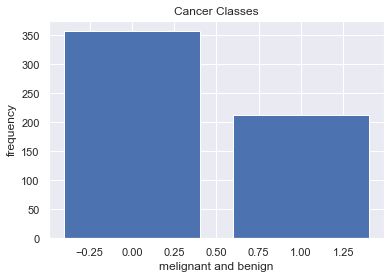

In [36]:
labels = ['BENIGN', 'MELIGNANT']
n = len([x for x in df['Target'] if x == 0.0])
a = len([x for x in df['Target'] if x == 1.0])

samples = [n, a]
index = np.arange(len(labels))

plt.bar(index, samples)
plt.xlabel("melignant and benign")
plt.ylabel("frequency")
plt.title("Cancer Classes")
plt.show()

## Training the algorithm

In [175]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Build the model
classifier = svm.SVC(kernel = 'rbf', random_state = 0)

# Train the model
classifier.fit(features_train, targets_train.ravel())

# get the svm score
svm_score = cross_val_score(classifier, features_test, targets_test.ravel(), cv=10, scoring='accuracy')

## Model Prediction

In [176]:
# predict with model using the test data
pred = classifier.predict(features_test)

In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(targets_test, pred)

In [178]:
cm

array([[66,  1],
       [ 7, 40]])

In [179]:
# addomg the diagonals
#accuracy = number of correct prediction / total number of prediction
correct_pred = cm[0, 0] + cm[1, 1]
total_pred = cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0]
accuracy = (correct_pred) / (total_pred)
accuracy = accuracy * 100
print("Model Prediction: {:.2f}%".format(accuracy))

Model Prediction: 92.98%
